# ML Project: Cyber Bullying Classification

In [5]:
import pandas as pd
import numpy as np
from string import punctuation
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_json('data.json', lines=True)

df['Target'] = df['annotation'].apply(lambda x: x['label'][0])

df.drop(['annotation', 'extras', 'metadata'], axis=1, inplace=True)

In [3]:
df.sample(10)

,content,Target
17732,Do you really truly miss someone right now?,0
2448,YOUR INSANE BABBLE HAVE YOU LOST YO DAMN MIND?,1
9419,a fucking sexy librarian!,0
14709,Tell me about something you&apos;ve achieved?,0
1084,I hate you.,1
4721,Yea its got a heatsink bigger than a server lo...,1
19910,kkkk. hope you feel better!,0
13960,cool then we can start the one where we video...,0
4065,thx for the well wishes lisa! i hate taking me...,1
17973,Stretch your left arm out as far as you can W...,0


In [4]:
df['Target'].value_counts()

0    12179
1     7822
Name: Target, dtype: int64

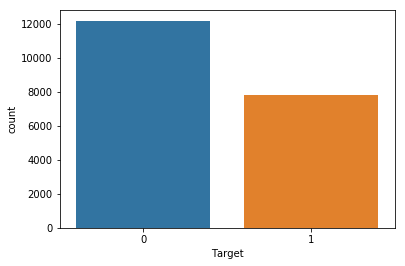

In [6]:
sns.countplot(df['Target'])

In [39]:
def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def tidy(x):
    x = re.sub("@[\w]*", " ", x)
    x = x.lower()
    x = re.sub("(https?://[\w./]*)", " ", x)
    x = re.sub("[^a-z#]", " ", x)
    x = re.sub("#[\w]*", " ", x)
    x = ' '.join([w for w in x.split()])
    return x

def clean(df):
    stemmer = PorterStemmer()
    words = stopwords.words("english")
    df['content'] = df['content'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", str(x)).split() if i.lower() not in words]))
    df['content'] = df['content'].apply(lambda x: tidy(str(x)))
    df['content'] = df['content'].apply(removepunc)
    return df

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

class_names=['Non Cyber Bullying','Cyber Bullying']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    #This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True`.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)#, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       # print("Normalized confusion matrix")
   # else:
       # print('Confusion matrix, without normalization')

  #  print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
df2 = df.copy()

In [9]:
clean(df)

,content,Target
0,get fuck real dude,1
1,dirti come crook rengel dem fuck corrupt joke ...,1
2,fuck could day let hour ping later sched write...,1
3,dude dont finish enclos fuck shower hate half ...,1
4,wtf talk men men that menag gay,1
5,ill save troubl sister come big ol fuck franc ...,1
6,im dead seriou real athlet never cheat even ap...,1
7,go absolut insan hate bearer bad news lol dont...,1
8,lmao im watch thing ahaha gay guy hilari dede ...,1
9,lol said call jail cell gay guy paradis ahaha,1


In [10]:
vectorizer = TfidfVectorizer()

final_features = vectorizer.fit_transform(df['content']).toarray()

In [11]:
final_features.shape

(20001, 12810)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(final_features, df['Target'], 
                                                    test_size=0.20, random_state = 42)


In [13]:
y_train.value_counts()

0    9755
1    6245
Name: Target, dtype: int64

In [14]:
y_test.value_counts()

0    2424
1    1577
Name: Target, dtype: int64

In [ ]:
# Linear SVM

In [15]:
lsvm = LinearSVC()
model_lsvm = lsvm.fit(X_train, y_train)

pred_lsvm = model_lsvm.predict(X_test)

In [16]:
cm_lsvm = confusion_matrix(y_test,pred_lsvm)
print(cm_lsvm)

[[2065  359]
 [ 202 1375]]


In [19]:
print('Classification report for LinearSVM Model\n')
print(classification_report(y_test,pred_lsvm))

Classification report for LinearSVM Model

             precision    recall  f1-score   support

          0       0.91      0.85      0.88      2424
          1       0.79      0.87      0.83      1577

avg / total       0.86      0.86      0.86      4001



In [45]:
print('Accuracy for LinearSVM Model: {} %'.format(round(accuracy(cm_lsvm)*100,2)))

Accuracy for LinearSVM Model: 85.98 %


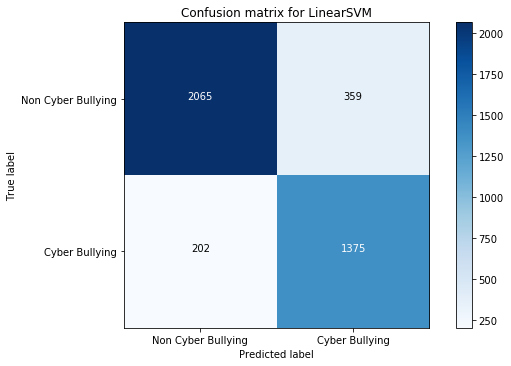

In [43]:
plt.figure(figsize=(8,5))
plot_confusion_matrix(cm_lsvm, classes=class_names,
                      title='Confusion matrix for LinearSVM')
plt.show()

In [ ]:
# SGD Classifier

In [ ]:
#SDG = SGDClassifier(loss='hinge', penalty='l2')

#model_sdg = SDG.fit(X_train, y_train)

#pred_sdg = model_sdg.predict(X_test)

In [ ]:
#cm_sdg = confusion_matrix(y_test,pred_sdg)
#print(classification_report(y_test,pred_sdg))

In [ ]:
#print(accuracy(cm_sdg))

In [ ]:
# Random Forest

In [30]:
rfc = RandomForestClassifier()

model_rfc = rfc.fit(X_train, y_train)

pred_rfc = model_rfc.predict(X_test)

In [31]:
cm_rfc = confusion_matrix(y_test,pred_rfc)
print(cm_rfc)

[[2192  232]
 [ 106 1471]]


In [33]:
print('Classification report for Random Forest Model\n')
print(classification_report(y_test,pred_rfc))

Classification report for Random Forest Model

             precision    recall  f1-score   support

          0       0.95      0.90      0.93      2424
          1       0.86      0.93      0.90      1577

avg / total       0.92      0.92      0.92      4001



In [44]:
print('Accuracy for LinearSVM Model: {} %'.format(round(accuracy(cm_rfc)*100,2)))

Accuracy for LinearSVM Model: 91.55 %


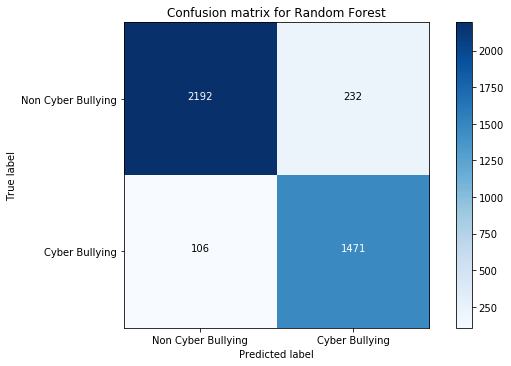

In [42]:
plt.figure(figsize=(8,5))
plot_confusion_matrix(cm_rfc, classes=class_names,
                      title='Confusion matrix for Random Forest')
plt.show()